In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
import json

path = 'C:/Users/user/Desktop/Pj/ocr/labels_reshape'
with open(path + '/000000000028637_005.json', 'r', encoding = 'utf-8') as f:
    json_data = json.load(f)
    
# print(json.dumps(json_data, ensure_ascii = False))
json_data

{'Info_Name': '만림문집_01 OCR 최종 DATA',
 'Info_Description': '한국국학진흥원에서 보유한 만림문집_01의 면단위 이미지에 면에 나타난 글자의 위치와 크기, 유니코드 값을 부여한 OCR용 AI 데이터',
 'Info_Original_Title': '만림문고(晩林文稿)',
 'Info_Original_Author': '권정일(權正鎰)',
 'Info_Original_Publication': '1919',
 'Info_Original_Categorize': '집부(集部)',
 'Info_Block': '석인본',
 'Info_Style': '해서',
 'Info_Text_Color': 'Color',
 'Info_Distortion': 'None',
 'Info_Visibility': 'Middle',
 'Info_Noise': 'Middle',
 'Info_Intervention': 'Middle',
 'Info_Image_Licence': 'CC BY-SA',
 'Info_Licenced_Institution': '한국국학진흥원',
 'Info_Institution_URL': 'www.koreastudy.or.kr',
 'Image_ID': '000000000028637_005',
 'Image_File_name': '000000000028637_005',
 'Info_Data_created': '2022-11-04',
 'Image_Data_captured': '2022-10-25',
 'Image_Width': 2198,
 'Image_Height': 3467,
 'Image_dpi': 300,
 'Image_color': 'Y',
 'Image_Char_col_no': 13,
 'Image_Char_row_no': 11,
 'Image_Text_Coord': [[{'bbox': [181.45, 62.6, 15.1, 10.9, 0, 0],
    'type': '1',
    'label': '晚'},
   {'bbo

In [13]:
coord_ls = json_data['Image_Text_Coord']
coord_ls

[[{'bbox': [181.45, 62.6, 15.1, 10.9, 0, 0], 'type': '1', 'label': '晚'},
  {'bbox': [181.55, 73.6, 14.9, 10.1, 0, 1], 'type': '1', 'label': '林'},
  {'bbox': [182.05, 84.2, 14.5, 10.5, 0, 2], 'type': '1', 'label': '文'},
  {'bbox': [182.15, 94.2, 14.5, 12.7, 0, 3], 'type': '1', 'label': '稿'},
  {'bbox': [183.05, 106.6, 12.9, 9.9, 0, 4], 'type': '1', 'label': '目'},
  {'bbox': [182.45, 116.2, 14.1, 14.1, 0, 5], 'type': '1', 'label': '錄'}],
 [{'bbox': [164.95, 72.1, 13.9, 13.1, 1, 0], 'type': '1', 'label': '巻'},
  {'bbox': [165.15, 84.7, 13.5, 10.7, 1, 1], 'type': '1', 'label': '之'},
  {'bbox': [165.65, 96.4, 12.9, 7.9, 1, 2], 'type': '1', 'label': '一'}],
 [{'bbox': [147.95, 82.3, 13.9, 14.3, 2, 0], 'type': '1', 'label': '詩'}],
 [{'bbox': [130.25, 94.7, 14.7, 12.7, 3, 0], 'type': '1', 'label': '伏'},
  {'bbox': [130.75, 108.6, 14.1, 10.5, 3, 1], 'type': '1', 'label': '次'},
  {'bbox': [130.55, 118.5, 14.5, 13.5, 3, 2], 'type': '1', 'label': '鳶'},
  {'bbox': [131.15, 132.5, 13.5, 11.3, 3, 3], 

In [17]:
bbox_ls = []
for idx in range(len(coord_ls)):
    for idx_2 in range(len(coord_ls[idx])):
        bbox = coord_ls[idx][idx_2]['bbox']
#         print(bbox)
        bbox_ls.append(bbox)
    
bbox_ls

[[181.45, 62.6, 15.1, 10.9, 0, 0],
 [181.55, 73.6, 14.9, 10.1, 0, 1],
 [182.05, 84.2, 14.5, 10.5, 0, 2],
 [182.15, 94.2, 14.5, 12.7, 0, 3],
 [183.05, 106.6, 12.9, 9.9, 0, 4],
 [182.45, 116.2, 14.1, 14.1, 0, 5],
 [164.95, 72.1, 13.9, 13.1, 1, 0],
 [165.15, 84.7, 13.5, 10.7, 1, 1],
 [165.65, 96.4, 12.9, 7.9, 1, 2],
 [147.95, 82.3, 13.9, 14.3, 2, 0],
 [130.25, 94.7, 14.7, 12.7, 3, 0],
 [130.75, 108.6, 14.1, 10.5, 3, 1],
 [130.55, 118.5, 14.5, 13.5, 3, 2],
 [131.15, 132.5, 13.5, 11.3, 3, 3],
 [131.15, 143.6, 13.7, 11.3, 3, 4],
 [131.05, 154.7, 14.3, 11.3, 3, 5],
 [131.25, 166.0, 13.7, 9.9, 3, 6],
 [130.05, 176.0, 14.9, 12.9, 3, 7],
 [113.63636363636363,
  96.06060606060605,
  13.73737373737374,
  11.111111111111109,
  4,
  0],
 [113.93939393939392,
  107.27272727272728,
  13.232323232323234,
  11.414141414141408,
  4,
  1],
 [113.13131313131312,
  119.29292929292929,
  14.444444444444434,
  13.131313131313117,
  4,
  2],
 [113.85, 132.5, 14.1, 11.3, 4, 3],
 [114.65, 143.4, 12.7, 11.3, 4, 4

In [21]:
x = []
y = []
w = []
h = []

for idx in range(len(bbox_ls)):
    x_point = bbox_ls[idx][0]
    x.append(x_point)
    
    y_point = bbox_ls[idx][1]
    y.append(y_point)
    
    width = bbox_ls[idx][2]
    w.append(width)
    
    height = bbox_ls[idx][3]
    h.append(height)
    
print(x)
print(y)
print(w)
print(h)


[181.45, 181.55, 182.05, 182.15, 183.05, 182.45, 164.95, 165.15, 165.65, 147.95, 130.25, 130.75, 130.55, 131.15, 131.15, 131.05, 131.25, 130.05, 113.63636363636363, 113.93939393939392, 113.13131313131312, 113.85, 114.65, 114.45, 113.55, 96.53373737373737, 97.45, 97.45, 96.85, 96.15599999999999, 97.15, 97.05, 96.45, 97.25, 96.65, 79.4024, 79.04400000000001, 62.85, 62.55, 62.45, 62.75, 63.05, 63.55, 65.85, 66.35, 65.75, 66.45, 66.15, 66.15, 67.05, 46.55, 46.25, 46.65, 45.55555555555555, 45.656565656565654, 46.45, 29.45, 29.65, 29.75, 29.35, 29.25, 27.804000000000002, 12.16, 12.1288, 13.333333333333332, 12.020202020202019]
[62.6, 73.6, 84.2, 94.2, 106.6, 116.2, 72.1, 84.7, 96.4, 82.3, 94.7, 108.6, 118.5, 132.5, 143.6, 154.7, 166.0, 176.0, 96.06060606060605, 107.27272727272728, 119.29292929292929, 132.5, 143.4, 155.0, 164.6, 95.61656565656565, 107.6, 121.7, 132.3, 144.2356, 156.6, 168.2, 178.8, 190.2, 199.5, 93.298, 109.87639999999999, 94.9, 107.9, 121.6, 132.7, 145.0, 157.7, 168.8, 178.8,

In [23]:
import cv2

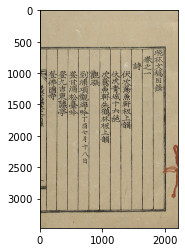

In [25]:
img = cv2.imread('C:/Users/user/Desktop/Pj/ocr/000000000028637_005.jpg',1)

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

In [27]:
resize_img = cv2.resize(img, dsize = (int(img.shape[1]/10), int(img.shape[0]/10)))
cv2.imshow('resize_img', resize_img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
resize_img2 = cv2.rectangle(resize_img, (int(x[0]), int(y[0])), (int(x[0] + w[0]), int(y[0] + h[0])), (255,0,0))
cv2.imshow('box',resize_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
# 전체 rectangle 뽑기

box_img = resize_img.copy()

for idx in range(len(x)):
    box_img = cv2.rectangle(box_img, (int(x[idx]), int(y[idx])), (int(x[idx] + w[idx]), int(y[idx] + h[idx])), (255,0,0))
    
cv2.imshow('box', box_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 함수 되나 해보자

In [ ]:
import os
import cv2

In [49]:
import json

path = 'C:/Users/user/Desktop/Pj/ocr/labels_reshape'
with open(path + '/000000000028637_005.json', 'r', encoding = 'utf-8') as f:
    json_data = json.load(f)

In [50]:
# json 파일에서 bbox값 추철
def make_bbox_list(label):
    coord_ls = label['Image_Text_Coord']
    
    bbox_ls = []
    for i in range(len(coord_ls)):
        for j in range(len(coord_ls[i])):
            bbox = coord_ls[i][j]['bbox']
            bbox_ls.append(bbox)
            
    return bbox_ls

In [51]:
bbox_ls = make_bbox_list(json_data)
# bbox_ls

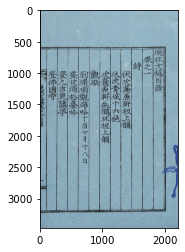

In [88]:
img = cv2.imread('C:/Users/user/Desktop/Pj/ocr/000000000028637_005.jpg',1)

plt.imshow(img)
plt.show()

In [89]:
# 이미지 크기 조절
def image_resize(img):
    resize_img = cv2.resize(img, dsize = (int(img.shape[1] / 10), int(img.shape[0] / 10)))
    return resize_img

In [90]:
resize_img = image_resize(img)

In [91]:
# bbox 만들기
def bboxing(img, i):
    x = bbox_ls[i][0]
    y = bbox_ls[i][1]
    w = bbox_ls[i][2]
    h = bbox_ls[i][3]

    bbox_img = cv2.rectangle(img, (int(x), int(y)), (int(x + w), int(y + h)), (255,0,0))
    
    return bbox_img

In [92]:
bbox_img = resize_img.copy()

In [93]:
# bbox 개수만큼 bbox 만들기 반복
for i in range(len(bbox_ls)):
    bbox_img = bboxing(bbox_img, i)

In [94]:
# 결과 확인
cv2.imshow('box', bbox_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

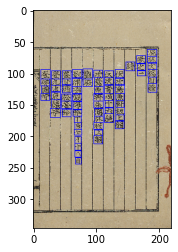

In [95]:
cvt_bbox_img = cv2.cvtColor((bbox_img), cv2.COLOR_BGR2RGB)
plt.imshow(cvt_bbox_img)
plt.show()

### 합치기

In [96]:
image_path = 'C:/Users/user/Desktop/Pj/ocr/000000000028637_005.jpg'
json_path = 'C:/Users/user/Desktop/Pj/ocr/labels_reshape/000000000028637_005.json'

In [104]:
def make_bbox_image(image_path, json_path):
    with open(json_path, 'r', encoding = 'utf-8') as f:
        json_data = json.load(f)
        
        coord_ls = json_data['Image_Text_Coord']

        bbox_ls = []
        for i in range(len(coord_ls)):
            for j in range(len(coord_ls[i])):
                bbox = coord_ls[i][j]['bbox']
                bbox_ls.append(bbox)
        
        img = cv2.imread(image_path, 1) # color로 읽어오기
        resize_img = cv2.resize(img, dsize = (int(img.shape[1] / 10), int(img.shape[0] / 10)))
        
        bbox_img = resize_img.copy()
        for l in range(len(bbox_ls)):
            x = bbox_ls[l][0]
            y = bbox_ls[l][1]
            w = bbox_ls[l][2]
            h = bbox_ls[l][3]
            
            bbox_img = cv2.rectangle(bbox_img, (int(x), int(y)), (int(x + w), int(y + h)), (255,0,0))
            
        cvt_bbox_img = cv2.cvtColor(bbox_img, cv2.COLOR_BGR2RGB)
        plt.imshow(cvt_bbox_img)
        plt.show()
        
        return bbox_img

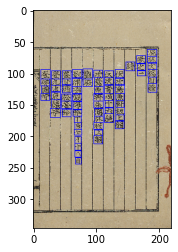

In [105]:
final = make_bbox_image(image_path, json_path)

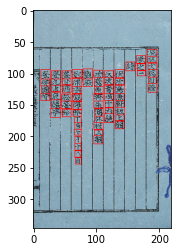

In [106]:
plt.imshow(final)
plt.show()